# Classification of Numerals of the Devanagri script using CNN.

## Importing libraries

In [157]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

## Using ImageDataGenerator Class of Keras to load image datasets from folder

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

### Loading the training data

In [279]:
train_generator = train_datagen.flow_from_directory('./Numeral/train/',
                                                   target_size = (70,70),
                                                   batch_size = 8,
                                                   class_mode = 'categorical')

Found 99 images belonging to 10 classes.


In [285]:
train_generator[2][0].shape

(8, 70, 70, 3)

### Peek into the images

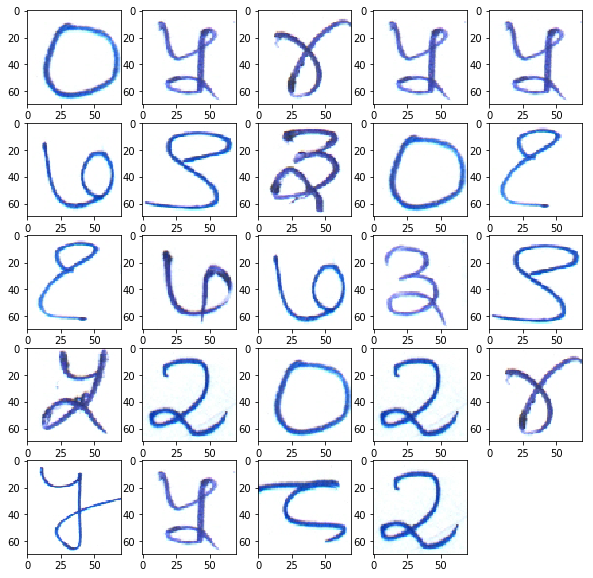

In [308]:
fig = plt.figure(figsize=(10,10))
index = 1
for i in range(1,5):
    for j in range(1,7):
        img = train_generator[i][0][j]
        fig.add_subplot(5,5,index)
        plt.imshow(img)
        index += 1
plt.show()

### Loading the validation data

In [37]:
valid_generator = train_datagen.flow_from_directory('./Numeral/valid/',
                                                   target_size = (70,70),
                                                   batch_size = 8,
                                                   class_mode = 'categorical')

Found 28 images belonging to 10 classes.


## Building the CNN model

In [218]:
model = Sequential()
model.add(Conv2D(6, (3,3), input_shape = (70,70,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(12, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

### Model Summary

In [192]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 68, 68, 6)         168       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 34, 34, 6)         0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 34, 34, 6)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 12)        660       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 12)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 16, 16, 12)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 3072)              0         
__________

## Training the model

In [219]:
es = EarlyStopping(monitor='val_acc', mode='max', patience=5)
model.fit_generator(train_generator,
                   epochs = 10,
                   validation_data = valid_generator,
                   verbose = 1,
                   callbacks = [es])

Epoch 1/10
13/13 [==============================] - 2s 172ms/step - loss: 2.4759 - acc: 0.1544 - val_loss: 2.2935 - val_acc: 0.1071
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 2.2512 - acc: 0.2220 - val_loss: 2.1682 - val_acc: 0.5000
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 2.0495 - acc: 0.3096 - val_loss: 1.9619 - val_acc: 0.7857
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 1.6120 - acc: 0.5360 - val_loss: 1.3995 - val_acc: 0.8214
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.9982 - acc: 0.8166 - val_loss: 0.9727 - val_acc: 0.8214
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.5759 - acc: 0.8693 - val_loss: 0.4720 - val_acc: 0.8929
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 0.3950 - acc: 0.8842 - val_loss: 0.4328 - val_acc: 0.9643
Epoch 8/10
13/13 [==============================] - 0s 17ms/step - loss: 0.2603 - acc: 

### Loading the test data

In [40]:
test_datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

test_generator = test_datagen.flow_from_directory( 'Numeral/test/',
                                                 target_size = (70,70),
                                                 batch_size = 1,
                                                 class_mode = None)

Found 34 images belonging to 10 classes.


## Generating the predictions based on the test data

In [283]:
predictions = model.predict_generator(test_generator)
predictions = np.argmax(predictions, axis = 1)

## Graphical representation of the test data and the predicted output

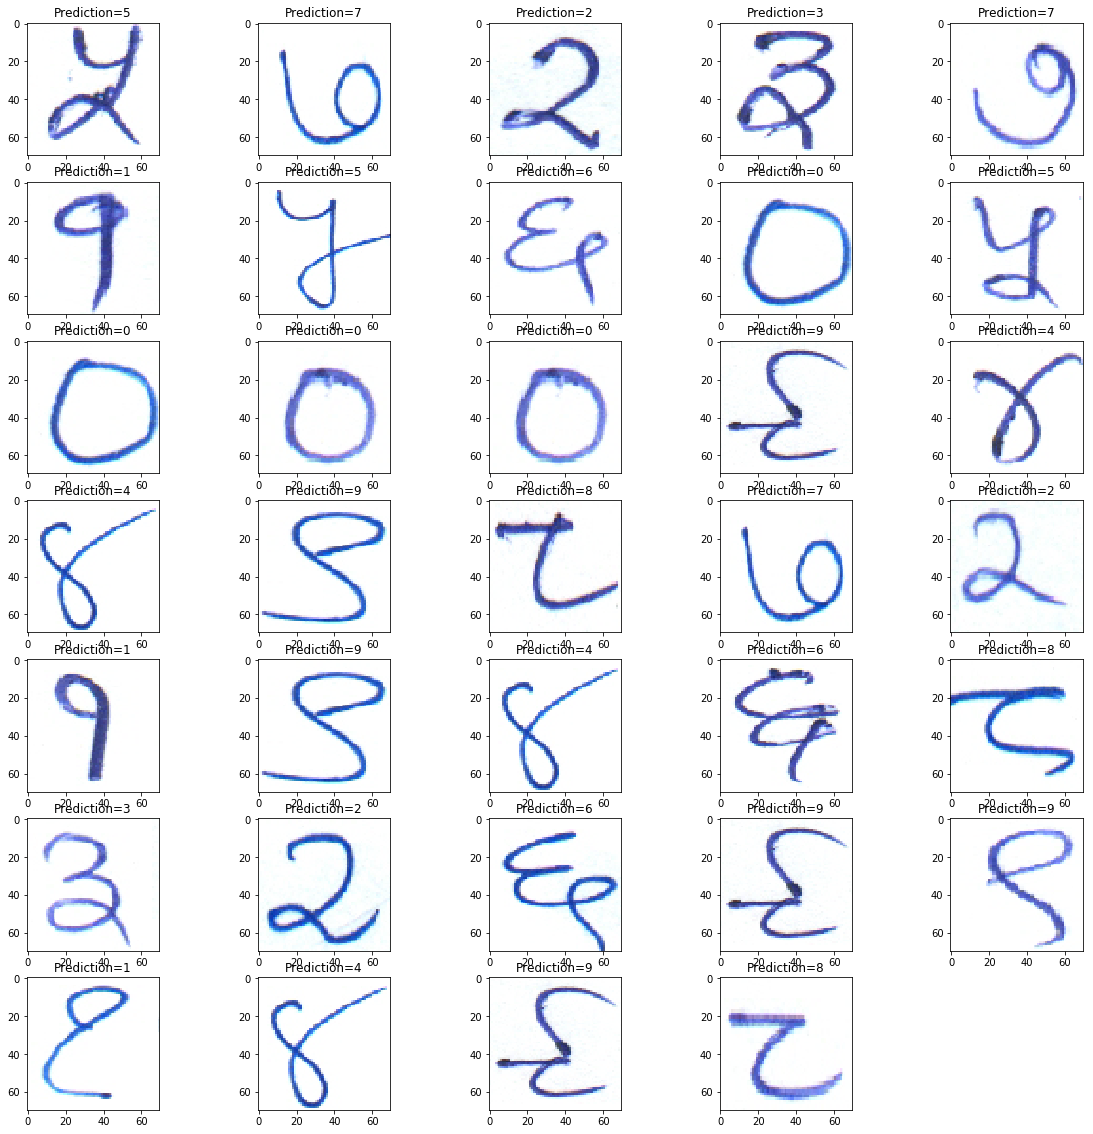

In [292]:
fig = plt.figure(figsize=(20,20))
for i in range(1,35):
    img = test_generator[i-1][0]
    fig.add_subplot(7,5,i)
    plt.imshow(img)
    plt.title('Prediction='+str(predictions[i-1]))
plt.show()